# Wavelet Compression, Denoising and Pattern Generation

Wavelet compression removes components with small magnitude from the wavelet decomposition of an image.

Agressive wavelet compression of an image only retains the parts of the image described by a small number of walets. When the image is uncomressed this results in artifacts relating to the structure of the wavelet used. When this is done with an imageconsisting of random white noise, these artifacts dominate and can form interesting patterns.

When this process is applied less agressively and a large number of wavelets are retaind, the artifacts are negligible, but the process can serve to remove noise from an image, since noise is generally not well described by wavelets

## Running this notebook
This notebook can be run interactively at http://mybinder.org/repo/mhlr/notebooks/WaveletPatterns.ipynb There select Cell -> Run All in the toolbar to make the visualization interactive. The startup takes time since Binder has to create a new Docker container.
If you are running an IPython notebook server, you can dowload this notebook and run it locally.

## Imports

In [1]:
%pylab inline
from ipywidgets.widgets import *
style.use('ggplot')
import pywt

Populating the interactive namespace from numpy and matplotlib


## Wavelet operations

In [2]:
def wvstats(WC):
    ZZZ = hstack(map(lambda x: ravel(asarray(x)), WC))
    print >>sys.stderr, ">>>", ZZZ.mean(), ZZZ.std(), ZZZ.min(), ZZZ.max()
    
#@jit(nopython=True)
def denoise(data, threshold, wavenm, mode='ppd'):
    wavelet = pywt.Wavelet(wavenm)
    WC = pywt.wavedec2(data,wavelet,mode=mode)
    wvstats(WC)
    WC = map(lambda x: pywt.thresholding.soft(x,threshold), WC)
    wvstats(WC)
    res = pywt.waverec2(WC, wavelet, mode=mode)
    return res

## Generate random image

In [3]:
img0 = randint(0,2,(2**10,2**10))

##  Visualization

>>> 0.29375833558 269.156618267 -40172.353668 124859.709064
>>> 0.293039023948 269.094720504 -40159.3576297 124846.713026


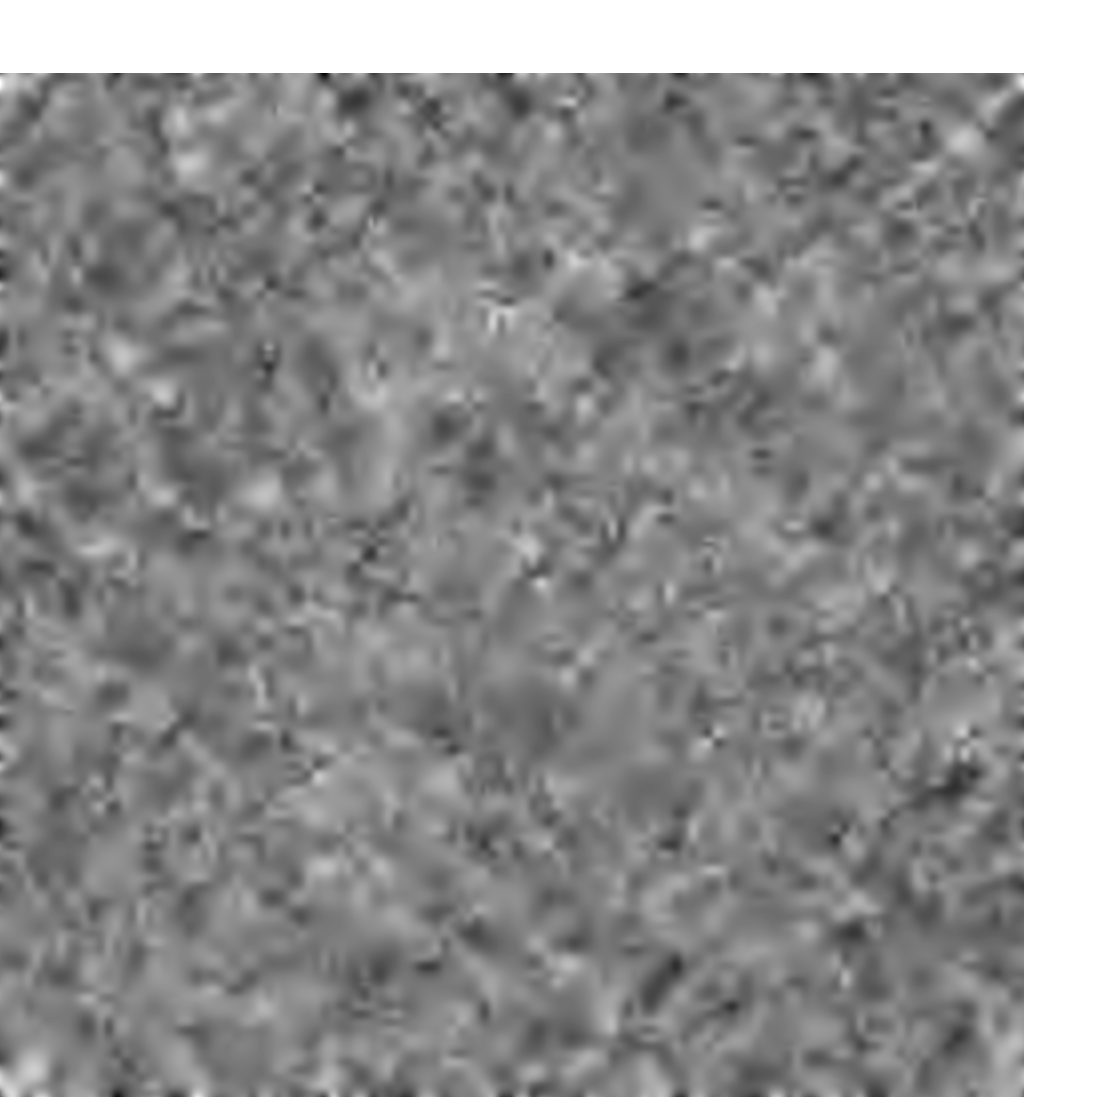

In [4]:
@interact
def view(wavelet=Select(options=pywt.wavelist(), value='bior3.1'),
         cmap=Select(options=cm.datad.keys(), value='binary'),
         threshold=(-1.,5.,0.1)):
    figure(figsize=(19,19))
    axis('off')
    img = img0
    figimage(denoise(img, 2**threshold, wavelet), cmap=cmap)
    

## Underlying random image

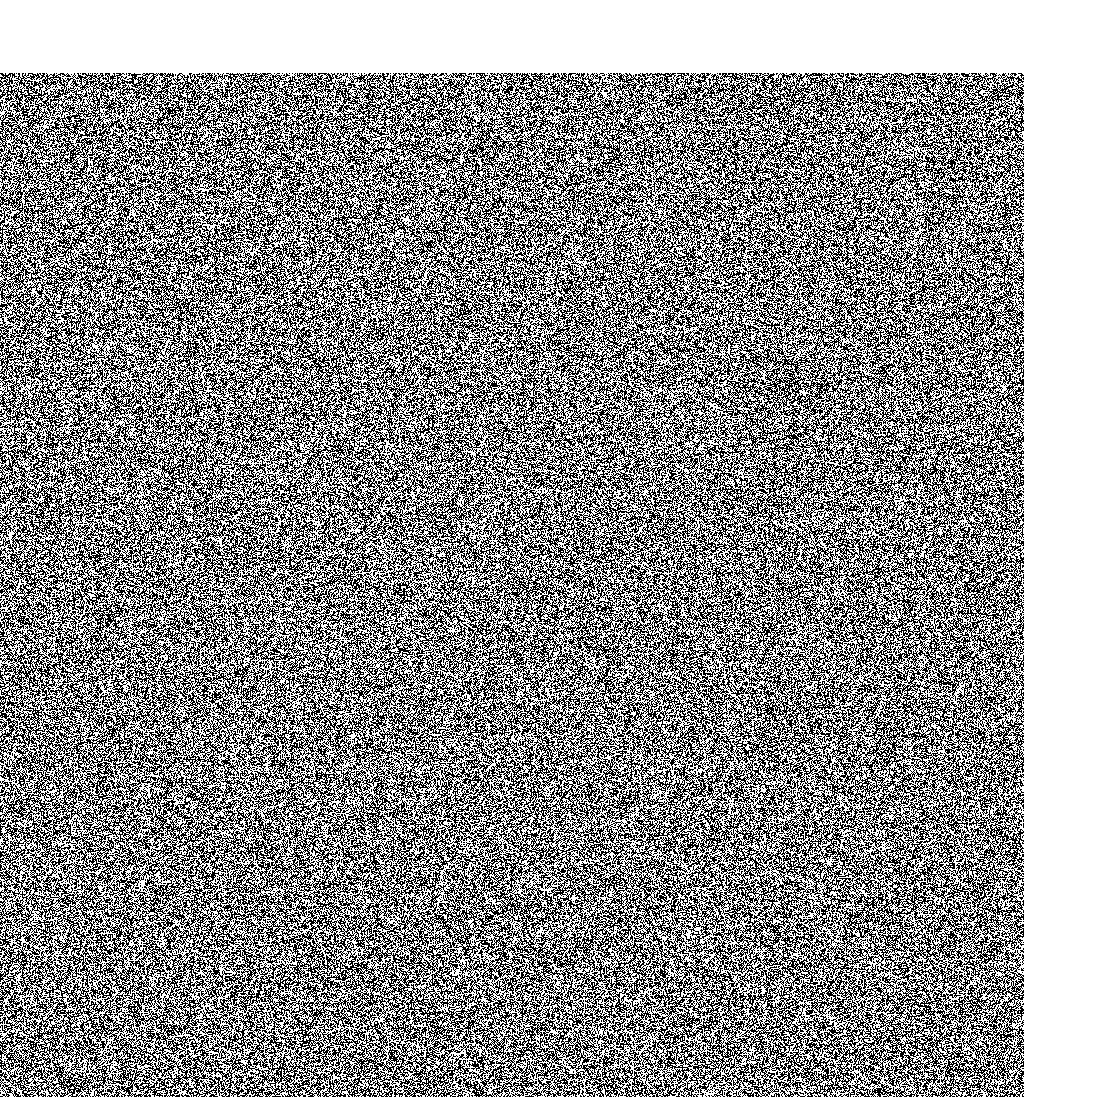

In [5]:
figure(figsize=(19,19)) 
axis('off')
zz=figimage(img0, cmap='binary')

In [8]:
randint(0,2,1000)

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1,